In [2]:
# Librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import arviz as az
import matplotlib.lines as mlines
import warnings
import bambi as bmb
# Disable a FutureWarning in ArviZ at the moment of running the notebook
az.style.use("arviz-darkgrid")
warnings.simplefilter(action='ignore', category=FutureWarning)

# Order Dataset

In [3]:
df = pd.read_csv('dataset_BreastExam.csv')
df.head()

,age_c,assess_c,cancer_c,density_c,famhx_c,bmi_c
0,62,1,0,2,0,24.023544
1,65,1,0,4,0,20.002008
2,69,0,0,2,0,29.052429
3,64,2,0,2,0,28.043850
4,63,3,0,2,0,33.729523


In [4]:
df = df.sample(frac=1).reset_index(drop=True)

# Analisis Descriptivos

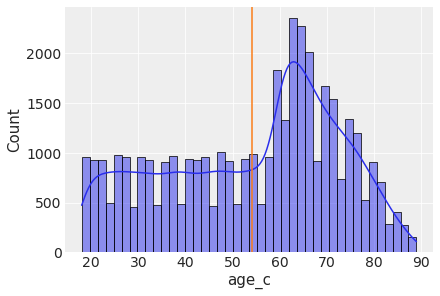

In [5]:
sns.histplot(data=df,x='age_c', kde = True).axvline(df["age_c"].mean(), color="C1")

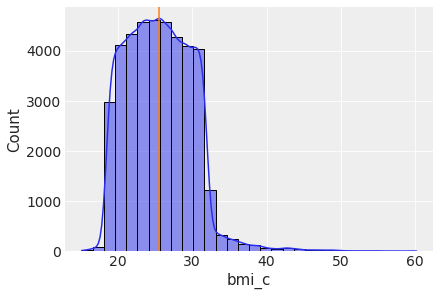

In [6]:
sns.histplot(data=df,x='bmi_c', kde = True, bins=30).axvline(df["bmi_c"].mean(), color="C1")

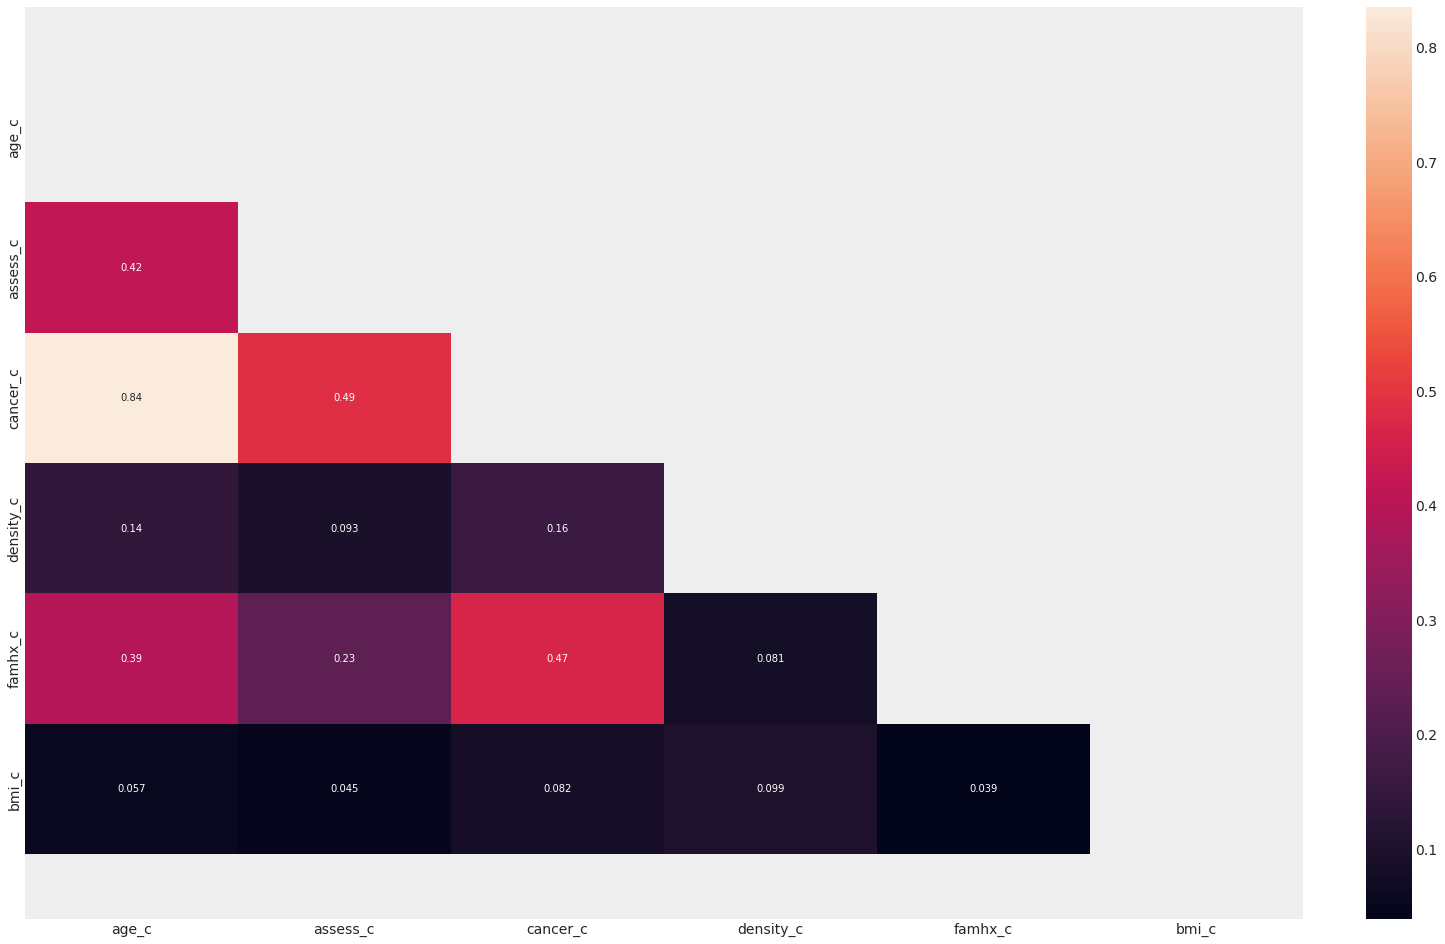

In [7]:
plt.figure(figsize=(20, 13))
corr = df.corr() 
mask = np.tri(*corr.shape).T 
sns.heatmap(corr.abs(), mask=mask, annot=True)
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.show()

In [182]:
df.dtypes

age_c          int64
assess_c       int64
cancer_c       int64
density_c      int64
famhx_c        int64
bmi_c        float64
dtype: object

# Muestra de los datos

In [183]:
import random as rn
n = [rn.randint(0,40000) for i in range(4000)]
n
df_m = df.iloc[n]

# Model 1

## Priors

In [50]:
pr = bmb.Prior('Normal', mu = 0, sigma=500)
dic_pr = {'age_c':pr,'assess_c':pr, 'density_c':pr,'famhx_c':pr,'bmi_c':pr}

{'age_c': Normal(mu: 0, sigma: 500),
 'assess_c': Normal(mu: 0, sigma: 500),
 'density_c': Normal(mu: 0, sigma: 500),
 'famhx_c': Normal(mu: 0, sigma: 500),
 'bmi_c': Normal(mu: 0, sigma: 500)}

## Modelo

$ y_i | \pi_i \sim Bernoulli(p) $

$ \pi_i = P\{y_i = 1 \} = \frac{exp(x^t_i * \beta)}{1+ exp(x^t_i * \beta)} $

$ \begin{split}Y =
\left\{
    \begin{array}{ll}
        1 & \textrm{SI presenta Cáncer} \\
        0 & \textrm{NO presenta Cáncer}
    \end{array}
\right.\end{split} $

In [84]:
model = bmb.Model("cancer_c['1'] ~ age_c+ assess_c + density_c + famhx_c + bmi_c", df_m, family="bernoulli",
                  priors=dic_pr)
model

Formula: cancer_c['1'] ~ age_c+ assess_c + density_c + famhx_c + bmi_c
Family name: Bernoulli
Link: logit
Observations: 4000
Priors:
  Common-level effects
    Intercept ~ Normal(mu: 0, sigma: 2.5)
    age_c ~ Normal(mu: 0, sigma: 500)
    assess_c ~ Normal(mu: 0, sigma: 500)
    density_c ~ Normal(mu: 0, sigma: 500)
    famhx_c ~ Normal(mu: 0, sigma: 500)
    bmi_c ~ Normal(mu: 0, sigma: 500)

## MCMC

In [85]:
cancer_fit = model.fit(draws=1000, chains=3)

Modeling the probability that cancer_c==1
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 4 jobs)
NUTS: [Intercept, age_c, assess_c, density_c, famhx_c, bmi_c]


Sampling 3 chains for 1_000 tune and 1_000 draw iterations (3_000 + 3_000 draws total) took 8365 seconds.


## Expliación grafica del modelo

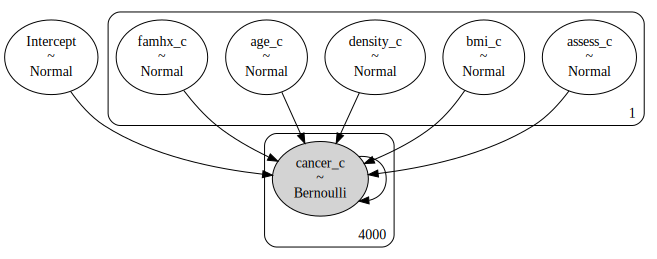

In [104]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin'

model.graph()

## HDI priors

array([[<AxesSubplot:title={'center':'assess_c'}>,
        <AxesSubplot:title={'center':'bmi_c'}>,
        <AxesSubplot:title={'center':'density_c'}>],
       [<AxesSubplot:title={'center':'age_c'}>,
        <AxesSubplot:title={'center':'famhx_c'}>,
        <AxesSubplot:title={'center':'Intercept'}>]], dtype=object)

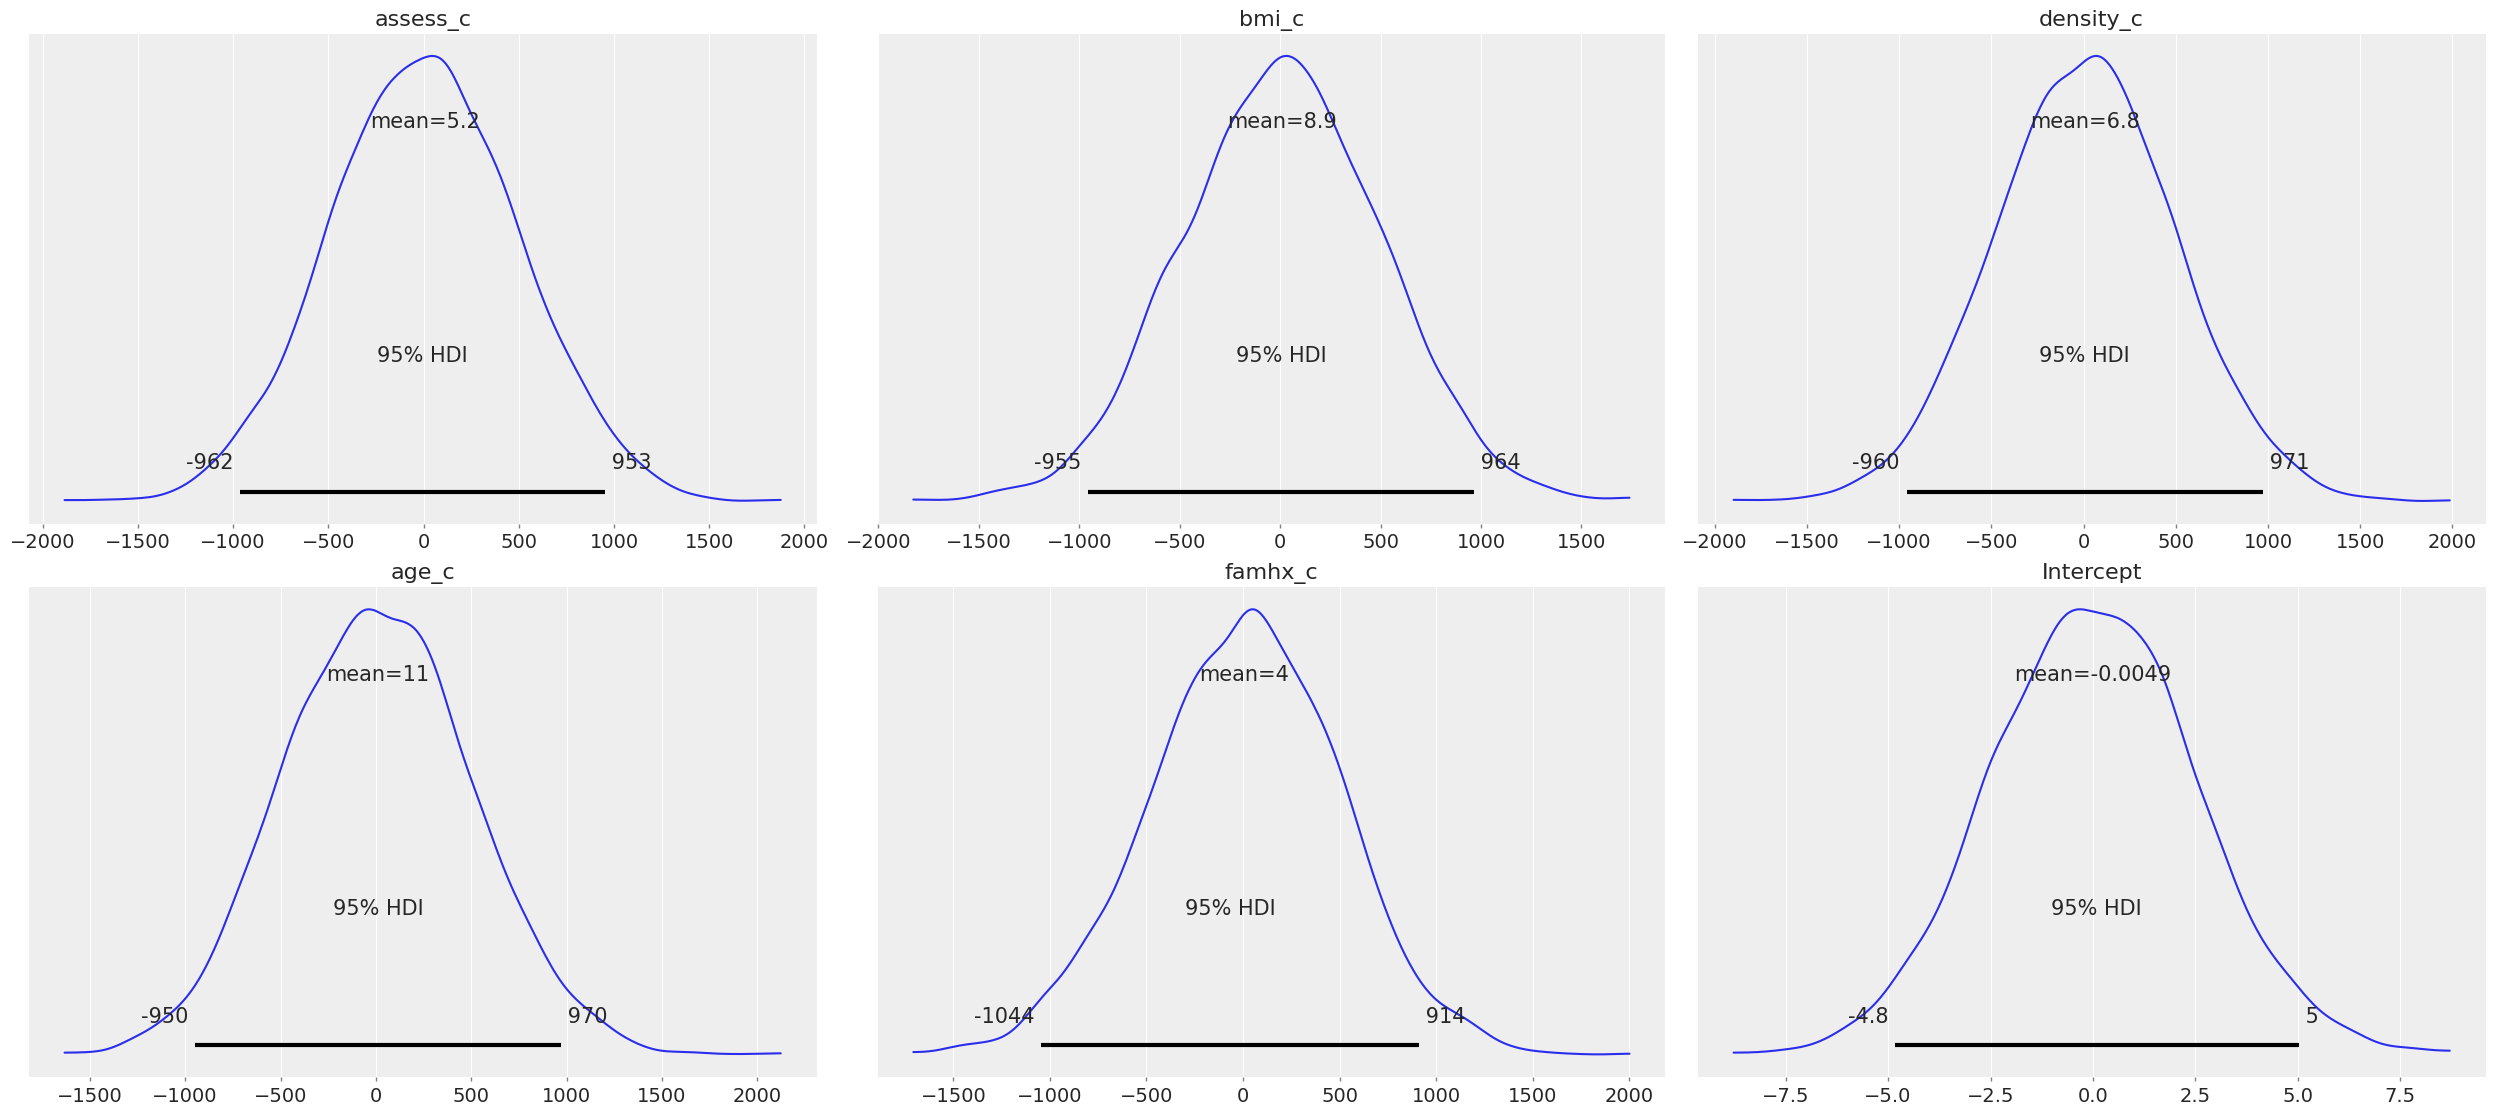

In [135]:
model.plot_priors(hdi_prob=0.95)

## Convergencia

### Traceplot

array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'Intercept'}>],
       [<AxesSubplot:title={'center':'age_c'}>,
        <AxesSubplot:title={'center':'age_c'}>],
       [<AxesSubplot:title={'center':'assess_c'}>,
        <AxesSubplot:title={'center':'assess_c'}>],
       [<AxesSubplot:title={'center':'density_c'}>,
        <AxesSubplot:title={'center':'density_c'}>],
       [<AxesSubplot:title={'center':'famhx_c'}>,
        <AxesSubplot:title={'center':'famhx_c'}>],
       [<AxesSubplot:title={'center':'bmi_c'}>,
        <AxesSubplot:title={'center':'bmi_c'}>]], dtype=object)

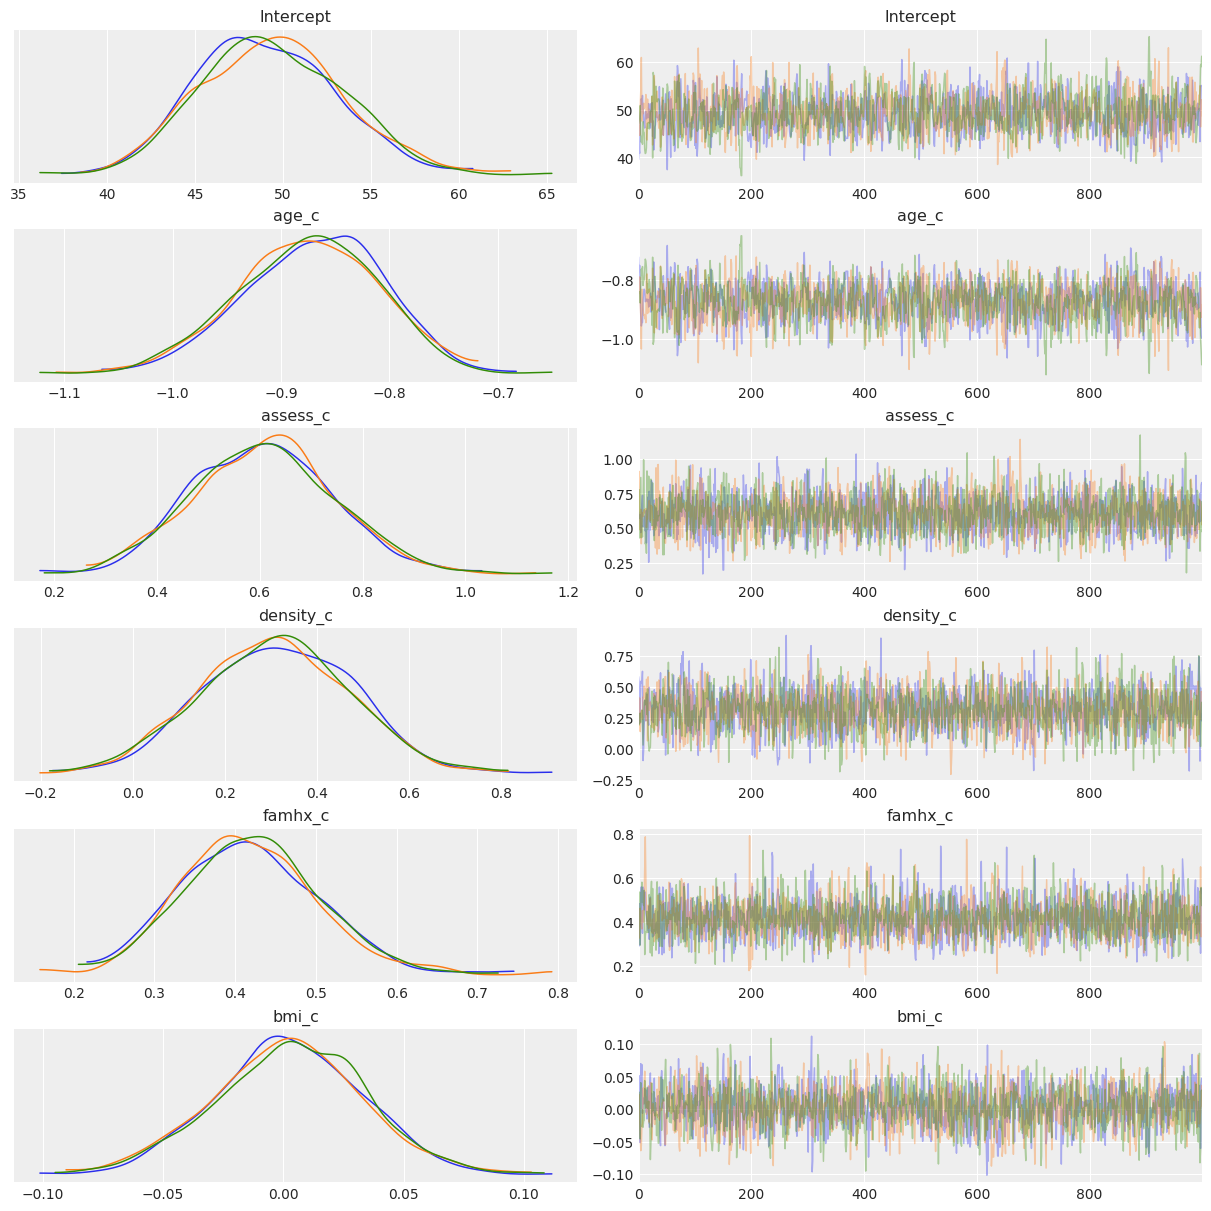

In [118]:
lista = ['Intercept', 'age_c', 'assess_c', 'density_c', 'famhx_c', 'bmi_c']
i = 5
#az.plot_trace(cancer_fit, compact=False,  var_names=lista[i])
az.plot_trace(cancer_fit, compact=False)

array([[<AxesSubplot:title={'center':'Intercept'}>,
        <AxesSubplot:title={'center':'Intercept'}, xlabel='Rank (all chains)', ylabel='Chain'>],
       [<AxesSubplot:title={'center':'age_c'}>,
        <AxesSubplot:title={'center':'age_c'}, xlabel='Rank (all chains)', ylabel='Chain'>],
       [<AxesSubplot:title={'center':'assess_c'}>,
        <AxesSubplot:title={'center':'assess_c'}, xlabel='Rank (all chains)', ylabel='Chain'>],
       [<AxesSubplot:title={'center':'density_c'}>,
        <AxesSubplot:title={'center':'density_c'}, xlabel='Rank (all chains)', ylabel='Chain'>],
       [<AxesSubplot:title={'center':'famhx_c'}>,
        <AxesSubplot:title={'center':'famhx_c'}, xlabel='Rank (all chains)', ylabel='Chain'>],
       [<AxesSubplot:title={'center':'bmi_c'}>,
        <AxesSubplot:title={'center':'bmi_c'}, xlabel='Rank (all chains)', ylabel='Chain'>]],
      dtype=object)

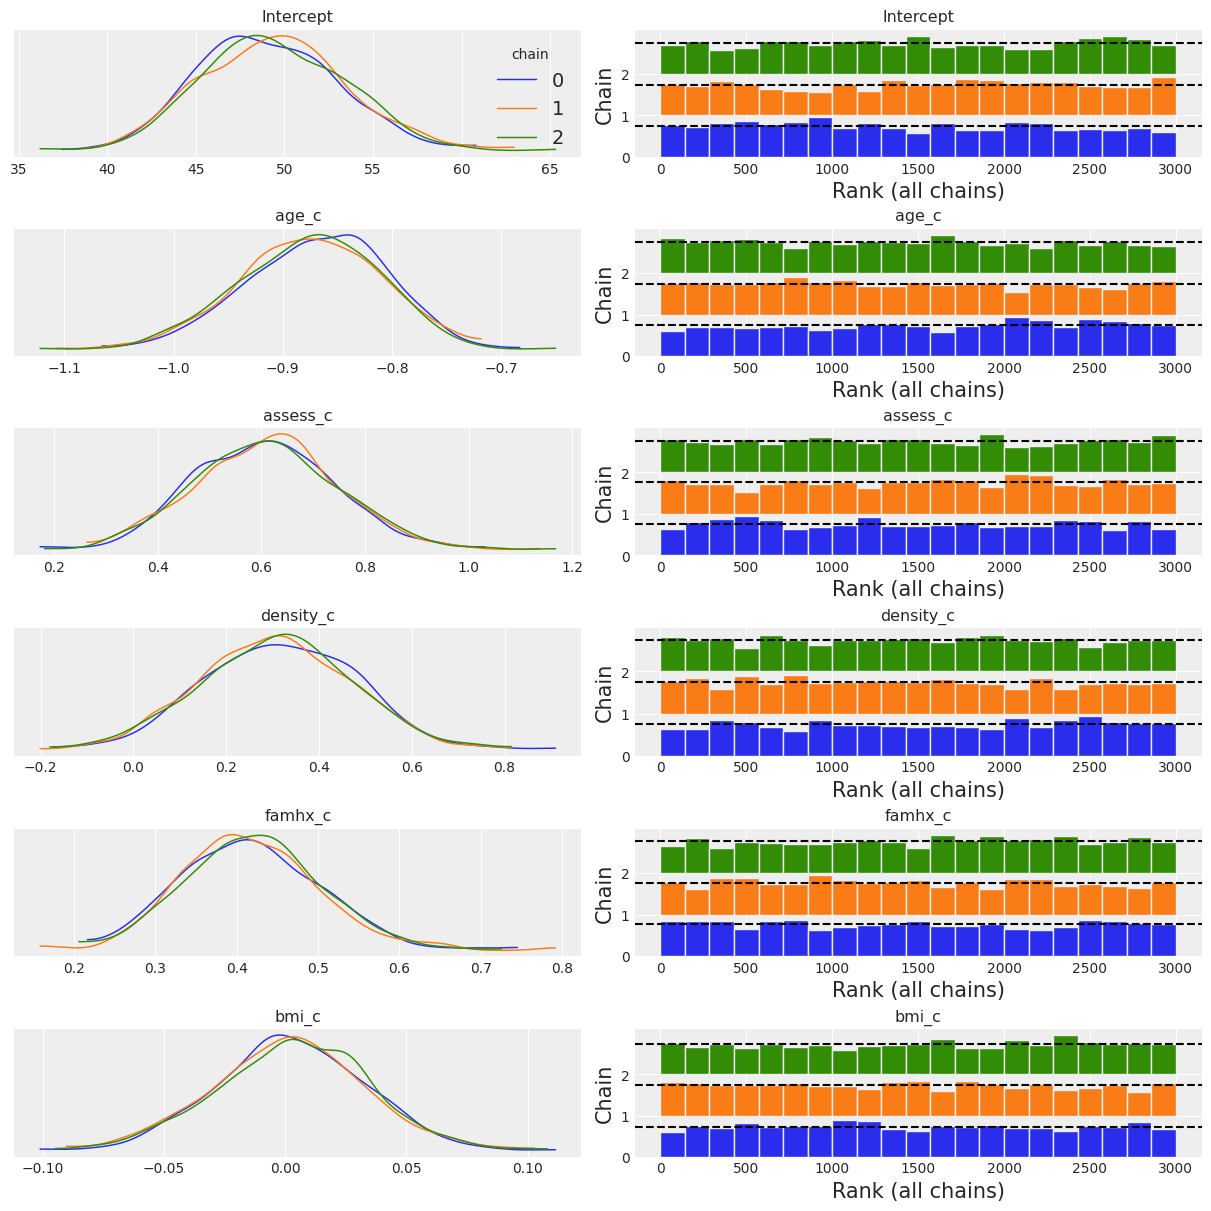

In [220]:
lista = ['Intercept', 'age_c', 'assess_c', 'density_c', 'famhx_c', 'bmi_c']
i = 1
az.plot_trace(cancer_fit, compact=False,kind='rank_bars', legend=True)

### Summary

In [212]:
az.summary(cancer_fit, hdi_prob=0.95)

,mean,sd,hdi_2.5%,hdi_97.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Intercept,49.283,4.052,41.961,57.424,0.104,0.073,1526.0,1667.0,1.0
age_c,-0.874,0.066,-1.001,-0.750,0.002,0.001,1483.0,1593.0,1.0
assess_c,0.608,0.136,0.335,0.860,0.002,0.002,3164.0,2148.0,1.0
density_c,0.311,0.164,0.013,0.633,0.003,0.002,2614.0,1995.0,1.0
famhx_c,0.418,0.085,0.258,0.584,0.002,0.001,3148.0,1865.0,1.0
bmi_c,0.002,0.031,-0.057,0.066,0.001,0.001,2270.0,1843.0,1.0


### Rhat

In [140]:
az.rhat(cancer_fit)

<xarray.Dataset>
Dimensions:    ()
Data variables:
    Intercept  float64 1.003
    age_c      float64 1.004
    assess_c   float64 0.9998
    density_c  float64 1.001
    famhx_c    float64 1.002
    bmi_c      float64 1.0

### WAIC

In [136]:
az.waic(cancer_fit)

C:\Users\villa\AppData\Local\Programs\Python\Python310\lib\site-packages\arviz\stats\stats.py:1661: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


Computed from 3000 posterior samples and 4000 observations log-likelihood matrix.

          Estimate       SE
elpd_waic  -199.79    44.07
p_waic       10.55        -

There has been a warning during the calculation. Please check the results.

### plot_ppc

<AxesSubplot:xlabel='cancer_c / cancer_c'>

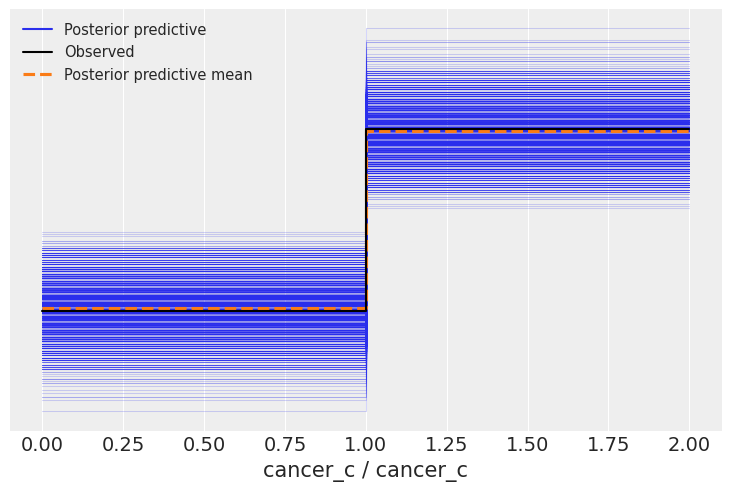

In [150]:
az.plot_ppc(cancer_fit, kind="kde")

### plot_bpv

<AxesSubplot:title={'center':'cancer_c / cancer_c'}>

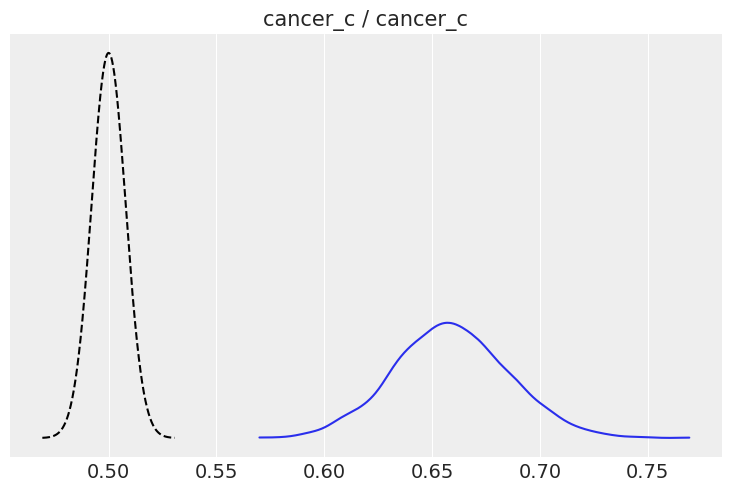

In [153]:
az.plot_bpv(cancer_fit,kind="p_value")

### plot_loo_pit

<AxesSubplot:xlabel='cancer_c'>

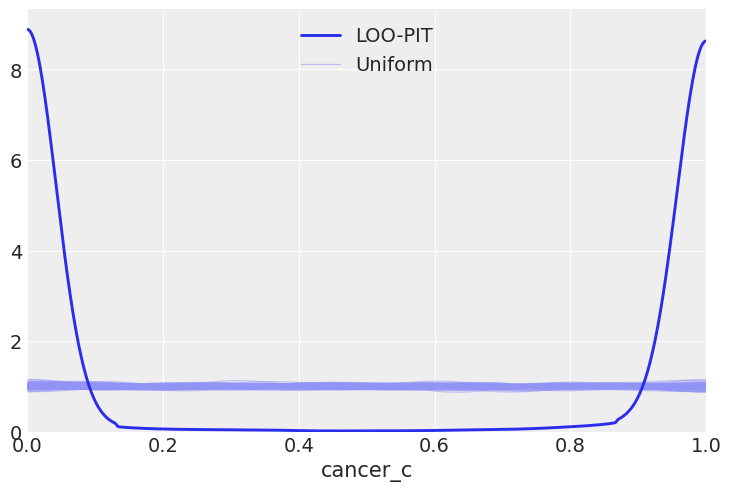

In [188]:
az.plot_loo_pit(cancer_fit,y='cancer_c')

<AxesSubplot:xlabel='cancer_c'>

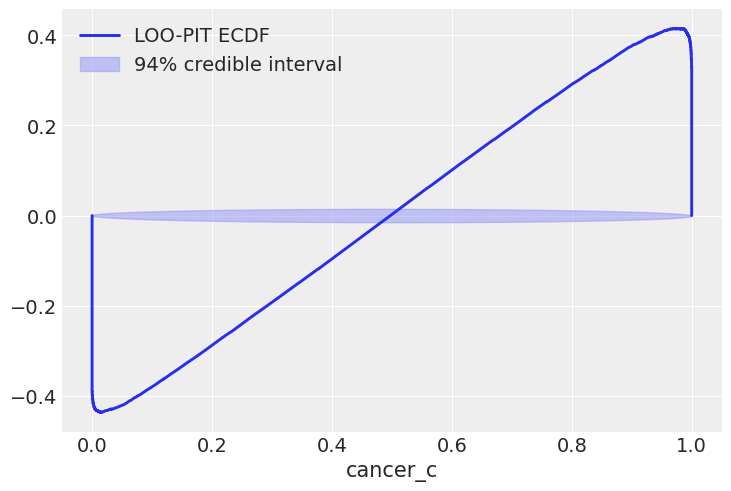

In [189]:
az.plot_loo_pit(cancer_fit, y="cancer_c", ecdf=True)

### plot_separation

<AxesSubplot:>

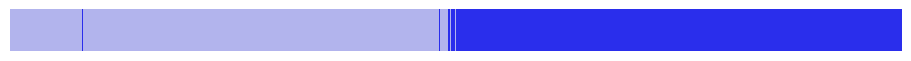

In [147]:
model.predict(cancer_fit, kind="pps")
az.plot_separation(cancer_fit, y='cancer_c', figsize=(9,0.5))

### plot Khat

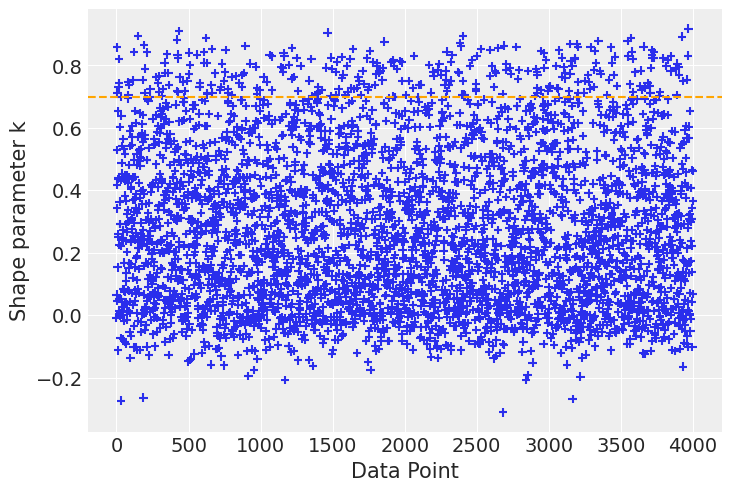

In [202]:
ax = az.plot_khat(loo.pareto_k.values.ravel())

threshold = 0.7
ax.axhline(threshold, ls="--", color="orange")
influential_observations = df_m.reset_index()[loo.pareto_k.values >= threshold].index

### Pareto k diagnostics

In [227]:
az.loo(cancer_fit)

C:\Users\villa\AppData\Local\Programs\Python\Python310\lib\site-packages\arviz\stats\stats.py:812: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


Computed from 3000 posterior samples and 4000 observations log-likelihood matrix.

         Estimate       SE
elpd_loo  -199.78    44.05
p_loo       10.55        -

There has been a warning during the calculation. Please check the results.
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)     3111   77.8%
 (0.5, 0.7]   (ok)        591   14.8%
   (0.7, 1]   (bad)       298    7.4%
   (1, Inf)   (very bad)    0    0.0%

# Nuevo Modelo

## Nueva Base de datos

In [203]:
dfn = pd.read_csv('dataset.csv')
dfn.head()

,age_c,assess_c,cancer_c,density_c,famhx_c,bmi_c
0,71,2,0,2,0,23.080536
1,76,1,0,2,0,22.709946
2,67,1,0,2,0,37.411346
3,60,2,0,3,0,24.563004
4,83,1,0,3,0,29.875631


In [204]:
dfn = dfn.sample(frac=1).reset_index(drop=True)

### Analisis Descriptivos

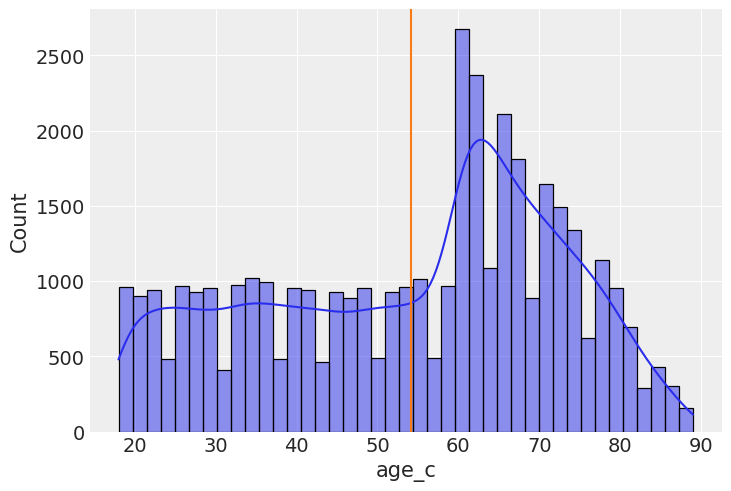

In [205]:
sns.histplot(data=dfn,x='age_c', kde = True).axvline(dfn["age_c"].mean(), color="C1")

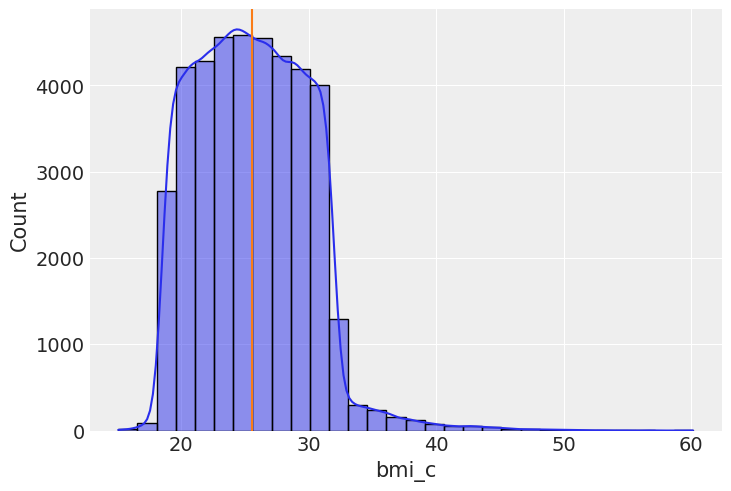

In [206]:
sns.histplot(data=dfn,x='bmi_c', kde = True, bins=30).axvline(dfn["bmi_c"].mean(), color="C1")

### Grafico de Correlación

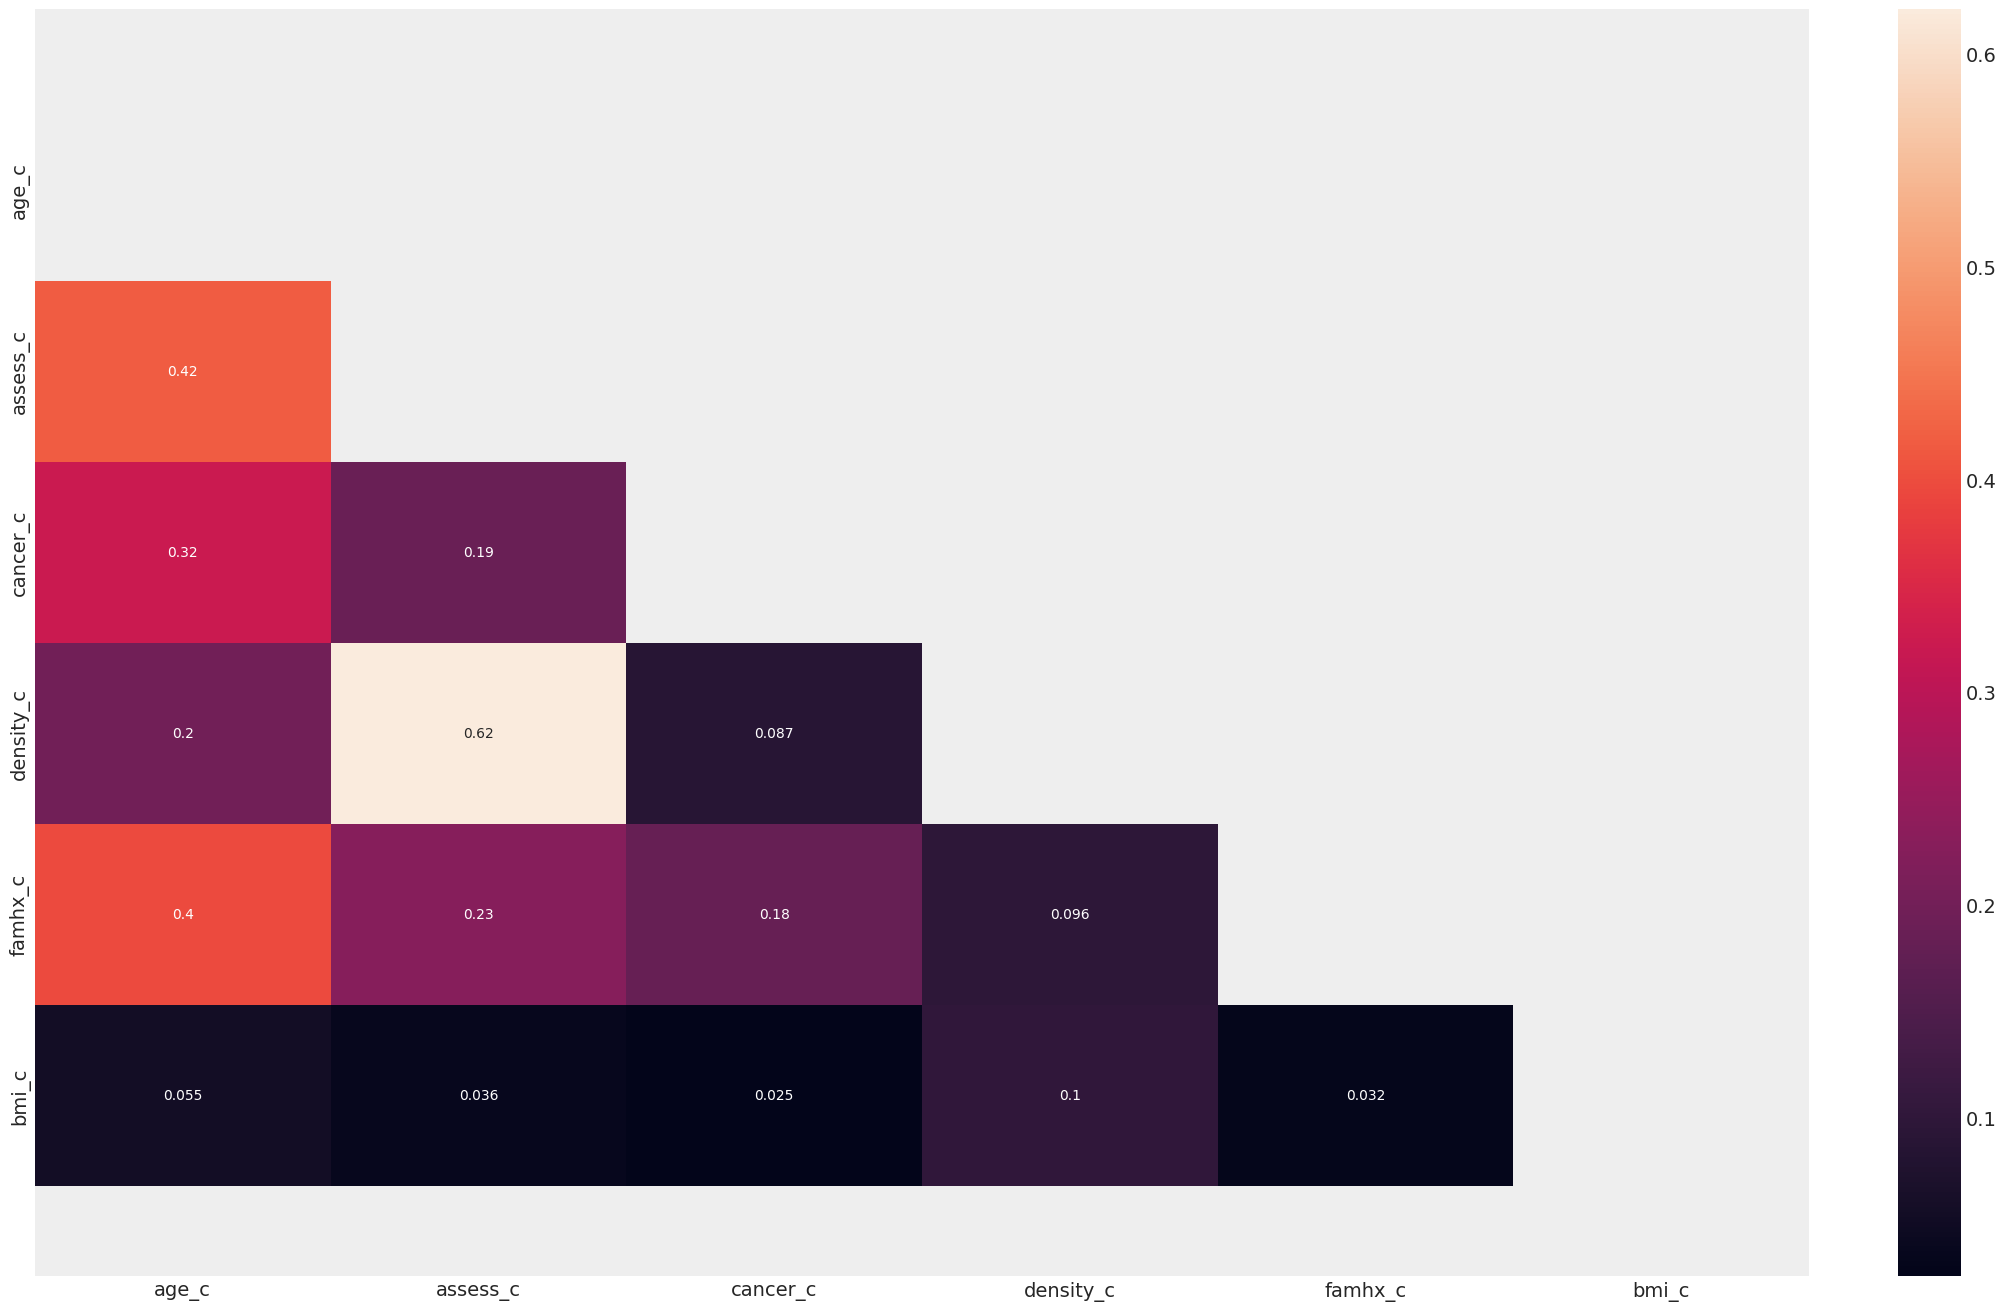

In [207]:
plt.figure(figsize=(20, 13))
corr = dfn.corr() 
mask = np.tri(*corr.shape).T 
sns.heatmap(corr.abs(), mask=mask, annot=True)
b, t = plt.ylim() 
b += 0.5 
t -= 0.5 
plt.ylim(b, t) 
plt.show()

In [171]:
dfn.dtypes

age_c          int64
assess_c       int64
cancer_c       int64
density_c      int64
famhx_c        int64
bmi_c        float64
dtype: object

### Muestra de los datos

In [208]:
import random as rn
n = [rn.randint(0,40000) for i in range(4000)]

In [209]:
dfn_m = dfn.iloc[n]